In [60]:
import os,sys, re
from importlib import reload
import numpy as np
import pandas as pd
from Bio.Seq import reverse_complement
#import torch
print(os.getpid())
sys.path.append(r"/lab/weissman_imaging/puzheng/Softwares")


from ChromAn.src.library_tools.primers import load_fasta_to_DataFrame
#import MERFISH_probe_design.probe_design.OTTable_dict as ot

3221368


In [11]:
from ChromAn.src.file_io.data_organization import Color_Usage, search_fovs_in_folders, color_usage_kwds

In [12]:
import ChromAn
reload(ChromAn.src.file_io.data_organization)
from ChromAn.src.file_io.data_organization import Data_Organization, search_fovs_in_folders
from ChromAn.src.file_io.dax_process import DaxProcesser
from ChromAn.src.visual_tools.interactive import imshow_mark_3d

In [36]:
os.path.isfile(color_usage_filename)

False

In [40]:
# where the original data saves
data_folder = r'/lab/weissman_imaging/puzheng/msBrain/20230816-asw016_region_1_MF1msBrainImmune'
experiment_date = os.path.basename(data_folder).split('-')[0]
print(experiment_date)
# Color usage file marks the organization of imaging files
color_usage_filename = os.path.join(data_folder, 'Analysis', 'color_usage.csv')

20230816


In [14]:
# visualize some images:
folders, fovs = search_fovs_in_folders(data_folder)
sel_fov = 10

test_ref_filename = os.path.join(folders[0], fovs[sel_fov])
test_filename = os.path.join(folders[-1], fovs[sel_fov])
# load ref
daxp_ref = DaxProcesser(test_ref_filename)
daxp_ref._load_image()
daxp_ref._corr_hot_pixels()
# load
daxp = DaxProcesser(test_filename)
daxp._load_image()
daxp._corr_hot_pixels()

- searching in folder: /lab/weissman_imaging/puzheng/msBrain/20230816-asw016_region_1_MF1msBrainImmune
-- 9 folders, 255 fovs detected.
Initialize DaxProcesser for file:/lab/weissman_imaging/puzheng/msBrain/20230816-asw016_region_1_MF1msBrainImmune/H0M1/Conv_zscan_010.dax
- New save file: /lab/weissman_imaging/puzheng/msBrain/20230816-asw016_region_1_MF1msBrainImmune/H0M1/Conv_zscan_010_processed.hdf5
-- all used channels: ['748', '637', '545', '477', '405']
-- single image size: [  13 2304 2304]
- Loaded images for channels:['748', '637', '545', '477', '405'] in 6.929s.
- Correct hot_pixel for channels: ['748', '637', '545', '477', '405']
-- Keep channels: ['748', '637', '545', '477', '405'] for corr_hot_pixel.
- Start hot_pixel correction for channels:['748', '637', '545', '477', '405'].
-- corrected hot_pixel for channel 748 in 3.388s.
-- corrected hot_pixel for channel 637 in 1.840s.
-- corrected hot_pixel for channel 545 in 1.640s.
-- corrected hot_pixel for channel 477 in 1.419s.

### Quickly visualize bead image to find bead-localizing z-frame

<IPython.core.display.Javascript object>


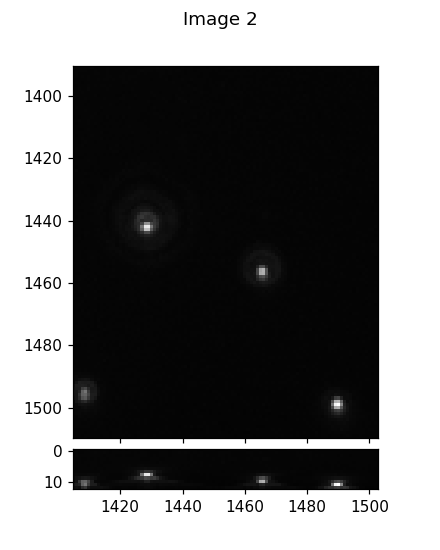

In [17]:
%matplotlib notebook
imshow_mark_3d([daxp.im_477, daxp_ref.im_477],)

<IPython.core.display.Javascript object>


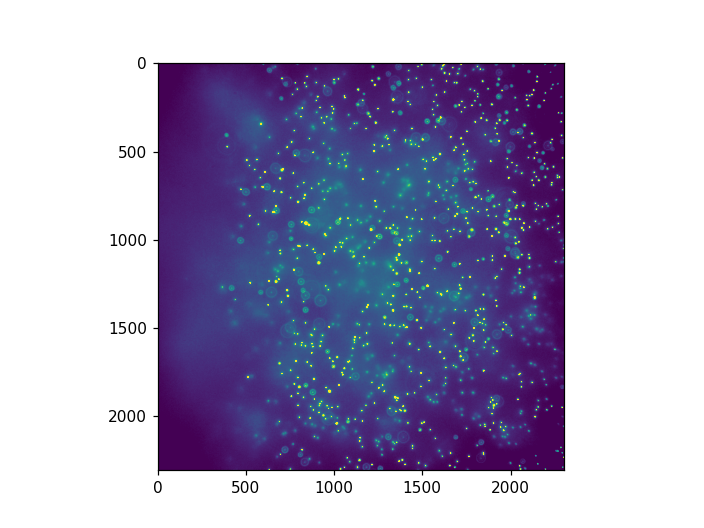

In [24]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(daxp_ref.im_477[11], vmin=500, vmax=2000)

<IPython.core.display.Javascript object>


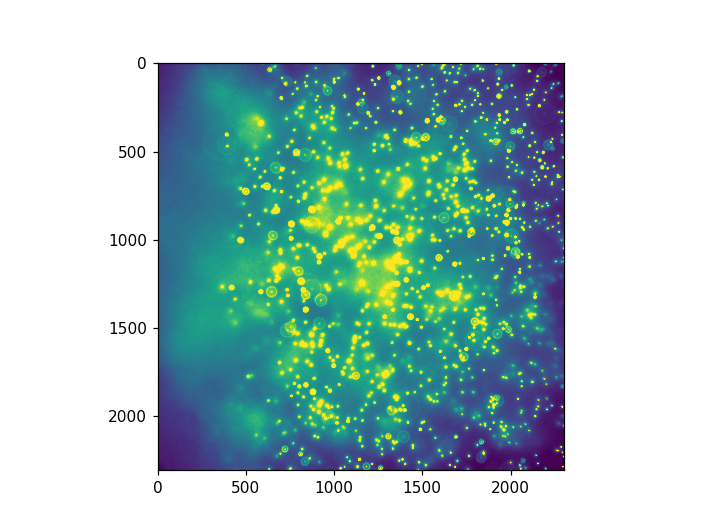

In [29]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(daxp.im_477[11], vmin=500, vmax=2000)

In [30]:
ref_Zstep = 11 # start from 0, manually check several images

In [ ]:
/lab/solexa_weissman/puzheng/MERFISH_Probes/Brain_MS_immune/

In [32]:
# Load readout names:
library_folder = r'/lab/solexa_weissman/puzheng/MERFISH_Probes/Brain_MS_immune'
readout_filename = os.path.join(library_folder, 'readouts.csv')
readouts = pd.read_csv(readout_filename) 
# select names
readout_names = readouts['Name']#[0:20]

In [48]:
ls ../../merlin_parameters/dataorganization

20210529-M1_38bits_MERFISH4.csv  20230622-C2_20bit.csv
20220303-M1_22bits_adaptors.csv  M1_22bits.csv
20230513-MO4_38bit.csv           M1_38bits.csv
20230513-MO4_38bit_new.csv       smFISH_with_CTP-09.csv


In [54]:
# Generate data organization
data_organization_filename = r'../../merlin_parameters/dataorganization/2023818-MF1_msBrain_22bit.csv'
_do = Data_Organization(data_organization_filename,)
if _do.is_empty():
    # create
    _do.create_from_colorUsage(color_usage_filename, data_folder,ref_Zstep, readout_names=readout_names)
    # save
    _do.save_to_file(overwrite=True)

- load color_usage from file: /lab/weissman_imaging/puzheng/msBrain/20230816-asw016_region_1_MF1msBrainImmune/Analysis/color_usage.csv
- searching in folder: /lab/weissman_imaging/puzheng/msBrain/20230816-asw016_region_1_MF1msBrainImmune
-- 9 folders, 255 fovs detected.
- 22 MERFISH rows appended.
- PolyT row appended.
- DAPI row appended.
Saving data_organization into file: ../../merlin_parameters/dataorganization/2023818-MF1_msBrain_22bit.csv.


In [55]:
color_usage_filename

'/lab/weissman_imaging/puzheng/msBrain/20230816-asw016_region_1_MF1msBrainImmune/Analysis/color_usage.csv'

In [56]:
Color_Usage(color_usage_filename).get_channel_info_for_round('H8M9')

- load color_usage from file: /lab/weissman_imaging/puzheng/msBrain/20230816-asw016_region_1_MF1msBrainImmune/Analysis/color_usage.csv


(['748', '637', '545', '477'], ['empty', 'PolyT', 'empty', 'beads'])

In [57]:
_do

,channelName,readoutName,imageType,imageRegExp,bitNumber,imagingRound,color,frame,zPos,fiducialImageType,fiducialRegExp,fiducialImagingRound,fiducialFrame,fiducialColor
0,bit1,Stv_3,748_637_545_477_405_s13,(?P<imageType>[\w|-]+)_(?P<fov>[0-9]+)_(?P<ima...,1,0,748,[0 5 10 15 20 25 30 35 40 45 50 55 60],[-6.5 -5.5 -4.5 -3.5 -2.5 -1.5 -0.5 0.5 1.5 2....,748_637_545_477_405_s13,(?P<imageType>[\w|-]+)_(?P<fov>[0-9]+)_(?P<ima...,0,58,477
1,bit2,Stv_4,748_637_545_477_405_s13,(?P<imageType>[\w|-]+)_(?P<fov>[0-9]+)_(?P<ima...,2,0,637,[1 6 11 16 21 26 31 36 41 46 51 56 61],[-6.5 -5.5 -4.5 -3.5 -2.5 -1.5 -0.5 0.5 1.5 2....,748_637_545_477_405_s13,(?P<imageType>[\w|-]+)_(?P<fov>[0-9]+)_(?P<ima...,0,58,477
2,bit3,Stv_5,748_637_545_477_405_s13,(?P<imageType>[\w|-]+)_(?P<fov>[0-9]+)_(?P<ima...,3,0,545,[2 7 12 17 22 27 32 37 42 47 52 57 62],[-6.5 -5.5 -4.5 -3.5 -2.5 -1.5 -0.5 0.5 1.5 2....,748_637_545_477_405_s13,(?P<imageType>[\w|-]+)_(?P<fov>[0-9]+)_(?P<ima...,0,58,477
3,bit4,Stv_6,748_637_545_477_s13,(?P<imageType>[\w|-]+)_(?P<fov>[0-9]+)_(?P<ima...,4,1,748,[0 4 8 12 16 20 24 28 32 36 40 44 48],[-6.5 -5.5 -4.5 -3.5 -2.5 -1.5 -0.5 0.5 1.5 2....,748_637_545_477_s13,(?P<imageType>[\w|-]+)_(?P<fov>[0-9]+)_(?P<ima...,1,47,477
4,bit5,Stv_7,748_637_545_477_s13,(?P<imageType>[\w|-]+)_(?P<fov>[0-9]+)_(?P<ima...,5,1,637,[1 5 9 13 17 21 25 29 33 37 41 45 49],[-6.5 -5.5 -4.5 -3.5 -2.5 -1.5 -0.5 0.5 1.5 2....,748_637_545_477_s13,(?P<imageType>[\w|-]+)_(?P<fov>[0-9]+)_(?P<ima...,1,47,477
5,bit6,Stv_8,748_637_545_477_s13,(?P<imageType>[\w|-]+)_(?P<fov>[0-9]+)_(?P<ima...,6,1,545,[2 6 10 14 18 22 26 30 34 38 42 46 50],[-6.5 -5.5 -4.5 -3.5 -2.5 -1.5 -0.5 0.5 1.5 2....,748_637_545_477_s13,(?P<imageType>[\w|-]+)_(?P<fov>[0-9]+)_(?P<ima...,1,47,477
6,bit7,Stv_9,748_637_545_477_s13,(?P<imageType>[\w|-]+)_(?P<fov>[0-9]+)_(?P<ima...,7,2,748,[0 4 8 12 16 20 24 28 32 36 40 44 48],[-6.5 -5.5 -4.5 -3.5 -2.5 -1.5 -0.5 0.5 1.5 2....,748_637_545_477_s13,(?P<imageType>[\w|-]+)_(?P<fov>[0-9]+)_(?P<ima...,2,47,477
7,bit8,Stv_10,748_637_545_477_s13,(?P<imageType>[\w|-]+)_(?P<fov>[0-9]+)_(?P<ima...,8,2,637,[1 5 9 13 17 21 25 29 33 37 41 45 49],[-6.5 -5.5 -4.5 -3.5 -2.5 -1.5 -0.5 0.5 1.5 2....,748_637_545_477_s13,(?P<imageType>[\w|-]+)_(?P<fov>[0-9]+)_(?P<ima...,2,47,477
8,bit9,Stv_11,748_637_545_477_s13,(?P<imageType>[\w|-]+)_(?P<fov>[0-9]+)_(?P<ima...,9,2,545,[2 6 10 14 18 22 26 30 34 38 42 46 50],[-6.5 -5.5 -4.5 -3.5 -2.5 -1.5 -0.5 0.5 1.5 2....,748_637_545_477_s13,(?P<imageType>[\w|-]+)_(?P<fov>[0-9]+)_(?P<ima...,2,47,477
9,bit10,Stv_12,748_637_545_477_s13,(?P<imageType>[\w|-]+)_(?P<fov>[0-9]+)_(?P<ima...,10,3,748,[0 4 8 12 16 20 24 28 32 36 40 44 48],[-6.5 -5.5 -4.5 -3.5 -2.5 -1.5 -0.5 0.5 1.5 2....,748_637_545_477_s13,(?P<imageType>[\w|-]+)_(?P<fov>[0-9]+)_(?P<ima...,3,47,477


## Copy position file

In [58]:
from shutil import copyfile

In [59]:
position_filename = os.path.join(data_folder, 'Experiment', 'positions_all.txt')

target_position_filename = os.path.join(r"../../merlin_parameters/positions/", f"{experiment_date}_positions.txt")

if os.path.isfile(position_filename):
    print(f"source position file: {position_filename}")
    print(f"target position file: {target_position_filename}")
    # copy
    copyfile(position_filename, target_position_filename)

source position file: /lab/weissman_imaging/puzheng/msBrain/20230816-asw016_region_1_MF1msBrainImmune/Experiment/positions_all.txt
target position file: ../../merlin_parameters/positions/20230816_positions.txt
